In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cereal_df = pd.read_csv('80cereal.csv')

In [4]:
cereal_df.head(4)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [81]:
cereal_df.shape

(77, 16)

In [7]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [83]:
cereal_df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [9]:
cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [11]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [85]:
nutritional_cols = ['calories','protein','fat','sodium',
                       'fiber','carbo','sugars','rating']

In [87]:
cereal_df[nutritional_cols].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,42.649351
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881534,4.349754,14.042010
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,18.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,33.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.802632,7.000000,40.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,51.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,94.000000


In [89]:
# Rounding off the ratings value to integers
cereal_df.rating = cereal_df.rating.apply(lambda x: int(round(x,0)))
cereal_df.rating.head(5)

0    68
1    34
2    59
3    94
4    34
Name: rating, dtype: int64

In [19]:
cereal_df.replace(-1, np.nan, inplace=True)

In [21]:
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,34
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,94
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,28
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,50
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,52


In [23]:
cereal_df.fillna(cereal_df.mean(numeric_only=True),inplace=True)

In [25]:
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,34
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,94
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,28
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,50
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,52


In [27]:
cereal_df.iloc[:,3:12].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881534,4.349754,69.478004,22.342523
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.802632,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [91]:
# identify and replace all noisy data with the median of attribute.
q1=cereal_df.iloc[:,3:12].quantile(0.25)
q2=cereal_df.iloc[:,3:12].quantile(0.5)
q3=cereal_df.iloc[:,3:12].quantile(0.75)


In [93]:
q1,q2,q3

(calories    100.0
 protein       2.0
 fat           0.0
 sodium      130.0
 fiber         1.0
 carbo        12.0
 sugars        3.0
 potass       45.0
 vitamins     25.0
 Name: 0.25, dtype: float64,
 calories    110.000000
 protein       3.000000
 fat           1.000000
 sodium      180.000000
 fiber         2.000000
 carbo        14.802632
 sugars        7.000000
 potass       90.000000
 vitamins     25.000000
 Name: 0.5, dtype: float64,
 calories    110.0
 protein       3.0
 fat           2.0
 sodium      210.0
 fiber         3.0
 carbo        17.0
 sugars       11.0
 potass      120.0
 vitamins     25.0
 Name: 0.75, dtype: float64)

In [33]:
pd.crosstab(cereal_df.mfr,cereal_df.type)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,5,1
P,9,0
Q,7,1
R,8,0


In [35]:
# which cereal will best rating 
cereal_df[cereal_df.rating==cereal_df.rating.max()][['name','rating']]

,name,rating
3,All-Bran with Extra Fiber,94


In [37]:
# which cereal will  worst rating
cereal_df[cereal_df.rating==cereal_df.rating.min()][['name','rating']]

,name,rating
10,Cap'n'Crunch,18


<Axes: title={'center': 'RATING OF HOT AND COLD CEREALS'}, xlabel='type', ylabel='rating'>

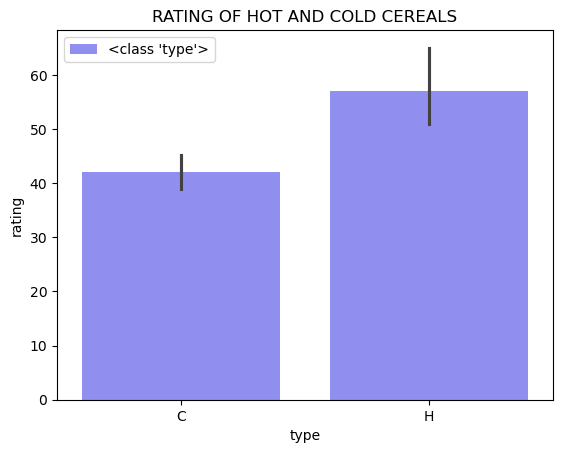

In [39]:
plt.title('RATING OF HOT AND COLD CEREALS')
sns.barplot(data=cereal_df, x='type', y='rating', palette='cool', hue= type)

#### Relation between sugars,calories,carbo and fat

<Axes: >

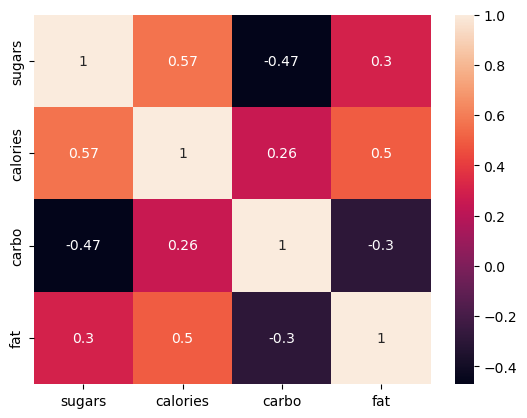

In [41]:
sns.heatmap(cereal_df[['sugars','calories','carbo','fat']].corr(),annot=True)

#### Manufactural that produce cereals with highest calories

In [43]:
cereal_df[cereal_df.calories==cereal_df.calories.max()][['mfr','name','calories']]

,mfr,name,calories
46,K,Mueslix Crispy Blend,160


<Axes: xlabel='calories', ylabel='rating'>

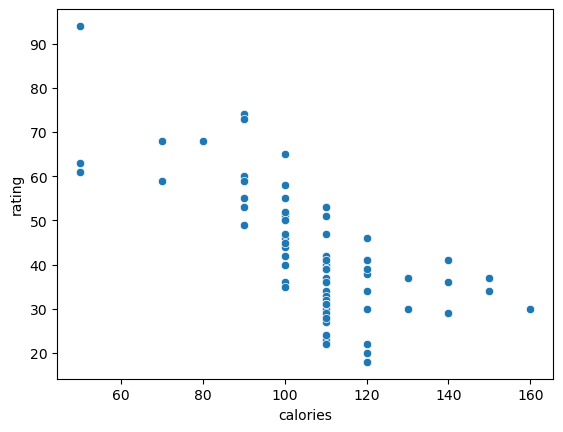

In [45]:
sns.scatterplot(data=cereal_df, x='calories', y='rating')

In [47]:
cereal_df[cereal_df.type== 'H']

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.000000,0.000000,98.666667,0,2,1.0,1.00,65
43,Maypo,A,H,100,4,1,0,0.0,16.000000,3.000000,95.000000,25,2,1.0,1.00,55
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,14.802632,7.026316,110.000000,0,1,1.0,0.67,51


In [57]:
cereal_df.sugars.mean(), cereal_df.sugars.max()

(7.026315789473685, 15.0)

In [61]:
High_sugars = cereal_df[(cereal_df.sugars>=10) & (cereal_df.sugars<=15)]

In [63]:
High_sugars

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,30
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.00,0.75,18
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13.0,55.0,25,2,1.00,1.00,23
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12.0,20.0,25,2,1.00,1.00,36
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13.0,65.0,25,2,1.00,1.00,22
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10.0,120.0,25,3,1.00,0.75,36
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13.0,30.0,25,2,1.00,1.00,32
25,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11.0,25.0,25,1,1.00,0.75,31
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,120,3,2,160,5.0,12.0,10.0,200.0,25,3,1.25,0.67,41


In [65]:
Low_sugars = cereal_df[(cereal_df.sugars<=10) & (cereal_df.sugars>=15)]

In [67]:
Low_sugars

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [69]:
High_sugars.mfr.value_counts()

mfr
G    9
K    8
P    5
Q    2
R    2
Name: count, dtype: int64

In [73]:
High_sugars.rating.describe()

count    26.000000
mean     31.192308
std       5.892498
min      18.000000
25%      28.250000
50%      31.000000
75%      35.750000
max      41.000000
Name: rating, dtype: float64

In [77]:
High_sugars[High_sugars.rating== High_sugars.rating.max()]


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
27,Fruit & Fibre Dates; Walnuts; and Oats,P,C,120,3,2,160,5.0,12.0,10.0,200.0,25,3,1.25,0.67,41
28,Fruitful Bran,K,C,120,3,0,240,5.0,14.0,12.0,190.0,25,3,1.33,0.67,41


In [49]:
cereal_df[cereal_df.type== 'C']

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,34
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,94
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,28
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,50
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,52
